# Step 1: Install the icgc module

In [1]:
!yes | pip uninstall icgc

Cannot uninstall requirement icgc, not installed
^C


In [2]:
!pip install icgc

_Now we should have the lastest version of the icgc code_

In [8]:
## Step 2: Import it

In [9]:
import icgc

**Temporary** _Configure the icgc module to use the portal server running on my laptop_

**Note** _Only needed until once the new portal server with the PQL enhancements is in production_

In [10]:
icgc.BASE_URL="http://localhost:8080/api/v1/"

## Step 3: Use it!

_Get a list of all the types of queries requests we can make_

In [11]:
print(icgc.request_types())

[u'donors', u'genes', u'mutations', u'occurrences']


_Request a single donor record, and print out the results_

In [12]:
donors=icgc.query(request_type='donors', pql='select(*),limit(1)')
print(donors)

[
    {
        "ageAtDiagnosis": 76, 
        "ageAtDiagnosisGroup": "70 - 79", 
        "analysisTypes": [
            "WGS"
        ], 
        "availableDataTypes": [
            "ssm", 
            "stsm"
        ], 
        "cnsmExists": false, 
        "expArrayExists": false, 
        "expSeqExists": false, 
        "gender": "male", 
        "id": "DO222843", 
        "jcnExists": false, 
        "methArrayExists": false, 
        "methSeqExists": false, 
        "mirnaSeqExists": false, 
        "pexpExists": false, 
        "primarySite": "Skin", 
        "projectId": "MELA-AU", 
        "sgvExists": false, 
        "ssmCount": 964360, 
        "state": "live", 
        "stsmExists": true, 
        "studies": [], 
        "survivalTime": 907, 
        "tumourStageAtDiagnosis": "IIC", 
        "vitalStatus": "deceased"
    }
]


_Now let's look at a record for genes..._

In [13]:
genes=icgc.query(request_type='genes', pql='select(*),limit(1)')
print(genes)

[
    {
        "affectedDonorCountTotal": 4573, 
        "chromosome": "8", 
        "description": "", 
        "end": 4852494, 
        "externalDbIds": {
            "entrez_gene": [
                "64478"
            ], 
            "hgnc": [
                "14026"
            ], 
            "omim_gene": [
                "608397"
            ], 
            "uniprotkb_swissprot": []
        }, 
        "id": "ENSG00000183117", 
        "name": "CUB and Sushi multiple domains 1", 
        "start": 2792875, 
        "strand": -1, 
        "symbol": "CSMD1", 
        "type": "protein_coding"
    }
]


_And now, let's look at one for mutations..._ 

In [14]:
mutations=icgc.query(request_type='mutations', pql='select(*),limit(1)')
print(mutations)

[
    {
        "affectedDonorCountTotal": 598, 
        "affectedProjectCount": 15, 
        "assemblyVersion": "GRCh37", 
        "chromosome": "7", 
        "end": 140453136, 
        "functionalImpact": [
            "High", 
            "Unknown", 
            "Unknown", 
            "Unknown"
        ], 
        "id": "MU62030", 
        "mutation": "A>T", 
        "referenceGenomeAllele": "A", 
        "start": 140453136, 
        "study": [
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG", 
            "PCAWG"

_And here's one for occurences!_

In [15]:
ocurrences=icgc.query(request_type='occurrences', pql='select(*),limit(1)')
print(ocurrences)                    

[
    {
        "chromosome": "5", 
        "donorId": "DO14814", 
        "end": 137781425, 
        "genes": [
            {
                "biotype": "protein_coding", 
                "chromosome": "5", 
                "consequence": [
                    {
                        "consequenceType": "downstream_gene_variant", 
                        "functionalImpact": "Unknown"
                    }, 
                    {
                        "consequenceType": "downstream_gene_variant", 
                        "functionalImpact": "Unknown"
                    }, 
                    {
                        "consequenceType": "downstream_gene_variant", 
                        "functionalImpact": "Unknown"
                    }, 
                    {
                        "consequenceType": "exon_variant", 
                        "functionalImpact": "Unknown"
                    }, 
                    {
                        "consequenceType": "synonymous_variant"

## Here's a more advanced demonstration 

_Get a count of the available donor data by cancer site_

In [16]:
cancerSites=icgc.query(request_type='donors', pql='count(),facets(primarySite)')
print(cancerSites)

{
    "primarySite": {
        "missing": 0, 
        "terms": [
            {
                "count": 2828, 
                "term": "Blood"
            }, 
            {
                "count": 1976, 
                "term": "Breast"
            }, 
            {
                "count": 1745, 
                "term": "Brain"
            }, 
            {
                "count": 1549, 
                "term": "Liver"
            }, 
            {
                "count": 1345, 
                "term": "Head and neck"
            }, 
            {
                "count": 1212, 
                "term": "Kidney"
            }, 
            {
                "count": 1102, 
                "term": "Lung"
            }, 
            {
                "count": 1077, 
                "term": "Prostate"
            }, 
            {
                "count": 1058, 
                "term": "Pancreas"
            }, 
            {
                "count": 921, 
                "term": "Colo

_Take our data for cancer sites, and extract the labels and the corresponding values_

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import json


_Import python graphing libraries_

In [18]:
data=json.loads(cancerSites)["primarySite"]["terms"]

labels=map(lambda x:x["term"],data)
numbers=map(lambda x:x["count"],data)


_Draw a bar chart of our results_

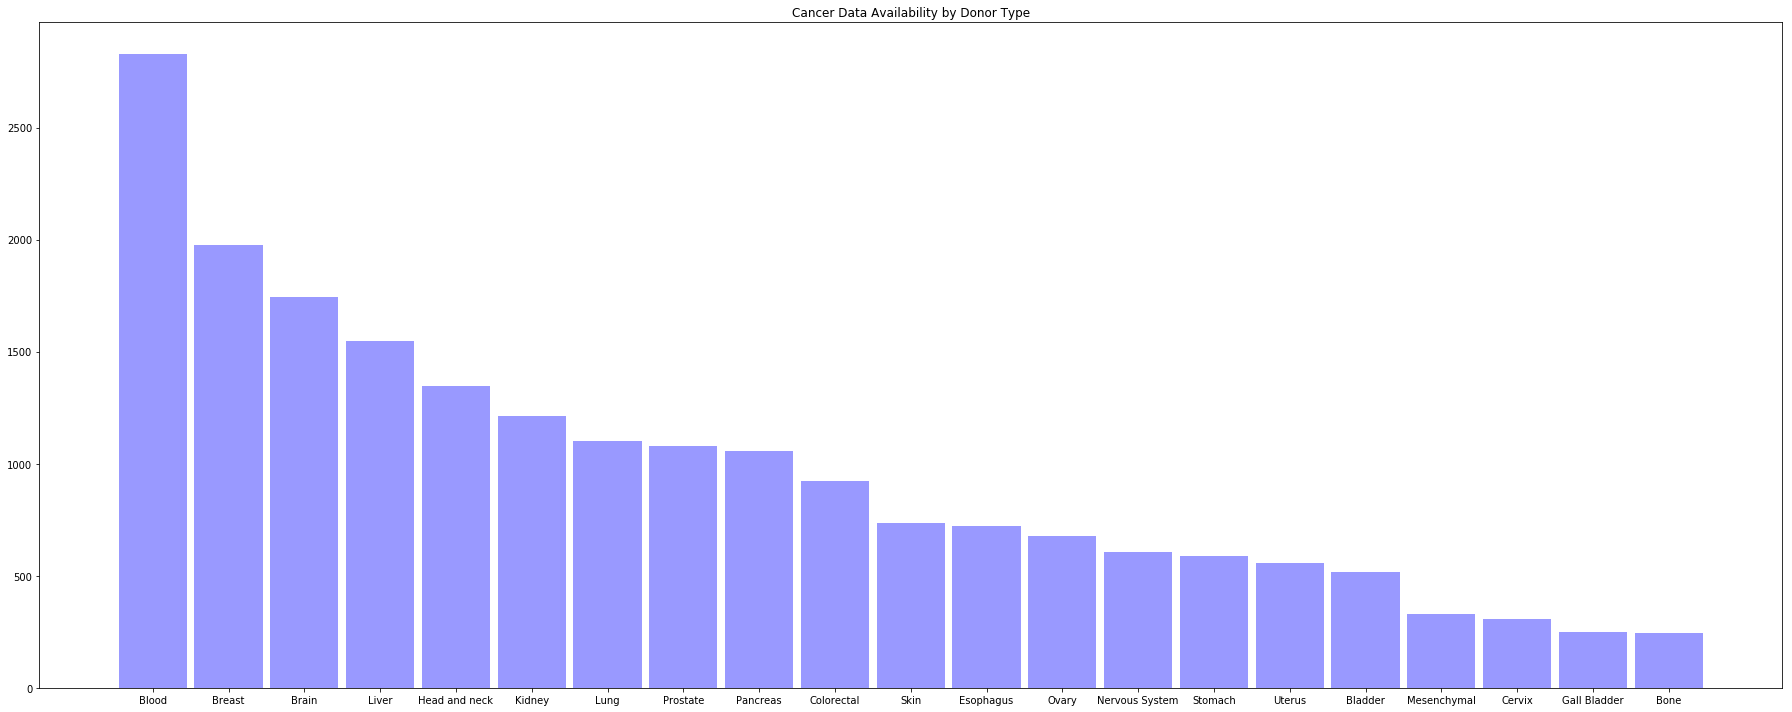

In [19]:
n=len(data)
fig, ax = plt.subplots(figsize=(25,10))
index = np.arange(n)

bar_width = 0.9
opacity = 0.4
ax.set_title('Cancer Data Availability by Donor Type')
ax.set_xticks(index)
ax.set_xticklabels(labels)

rects1 = ax.bar(index, numbers, bar_width,
                alpha=opacity, color='b')
fig.tight_layout()
plt.show()

In [20]:
labels

[u'Blood',
 u'Breast',
 u'Brain',
 u'Liver',
 u'Head and neck',
 u'Kidney',
 u'Lung',
 u'Prostate',
 u'Pancreas',
 u'Colorectal',
 u'Skin',
 u'Esophagus',
 u'Ovary',
 u'Nervous System',
 u'Stomach',
 u'Uterus',
 u'Bladder',
 u'Mesenchymal',
 u'Cervix',
 u'Gall Bladder',
 u'Bone']